# How do we integrate?

Think smarter, not harder!

Boltzmann: $e^{(-U(r)/kT)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(-5,5, 0.1)
kt = 1.0
y = np.exp(x)

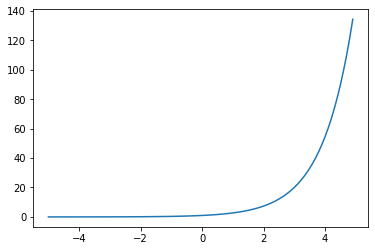

In [3]:
plt.figure()
plt.plot(x, y)
#plt.savefig('name.png')

# Monte Carlo
* Casino named Monte Carlo in Europe
* So named due to its random-choice nature

0. Create a system

The Algorithm:
1. Evaluate the energy of the system
1. Change your system from one "state" to another (randomly, however you want)
2. Evaluate the "energy" of the system after your change
3. Accept or Reject the move based on how likely that energy was (under Boltzmann distro)
5. Repeat

Accept: actually move to the new state, track this in our "trajectory"

Reject: do not move to the new state, try again

**How to accept/reject?**

* If $U_{new} < U_{old}$: $P(accept) = 1$.
* If $U_{new} > U_{old}$: $P(accept) \propto e^{-(U_{new}-U_{old})/kT}$

In [11]:
# Ising model
def energy(aligned):
  if aligned:
    return 1
  else:
    return -1

def total_energy(system):
  U = 0
  for i in range(len(system) - 1):
    U += energy(system[i] == system[i+1])
  return U

system = np.ones(10)
#for i in range(len(system)):
#  electron = system[i]

for i, electron in enumerate(system):
  if np.random.rand() < 0.5:
    system[i] = 0

print(system)

[0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]


In [15]:
def trial_move(system, T):
  # step 1: get the energy
  U_old = total_energy(system)
  # step 2: propose a move randomly
  # flip a spin!
  idx = np.random.randint(low=0, high=len(system)-1)
  if system[idx] == 1:
    system[idx] = 0
  else:
    system[idx] = 1
  # step 3: new energy!
  U_new = total_energy(system)
  # step 4: determine accept/reject
  if U_new > U_old:
    accept_prob = np.exp(-(U_new - U_old) / T)
    if np.random.rand() > accept_prob:
      #reject
      if system[idx] == 1:
        system[idx] = 0
      else:
        system[idx] = 1
      return system, U_old
    else:
      return system, U_new
  else:
    return system, U_new


In [16]:
def run(nsteps, T, system):
  U = []
  for step in range(nsteps):
    system, U_new = trial_move(system, T)
    U.append(U_new)
    if step%20 == 0:
      print(step, system)
  return(np.array(U)/len(system))

0 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
20 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
40 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
60 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
80 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
100 [1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
120 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
140 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
160 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
180 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


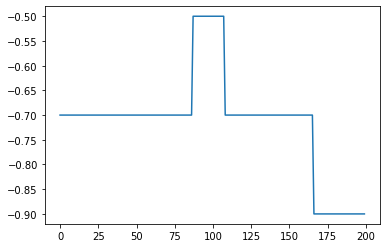

In [18]:
avg_U = run(200, 0.8, system)
plt.figure()
plt.plot(avg_U)

In [19]:
system

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0.])